# CLASE 9 - Visualizaciones y primeros pasos (parte II)
### Coderhouse - Data Science
Profe Jorge Ruiz

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


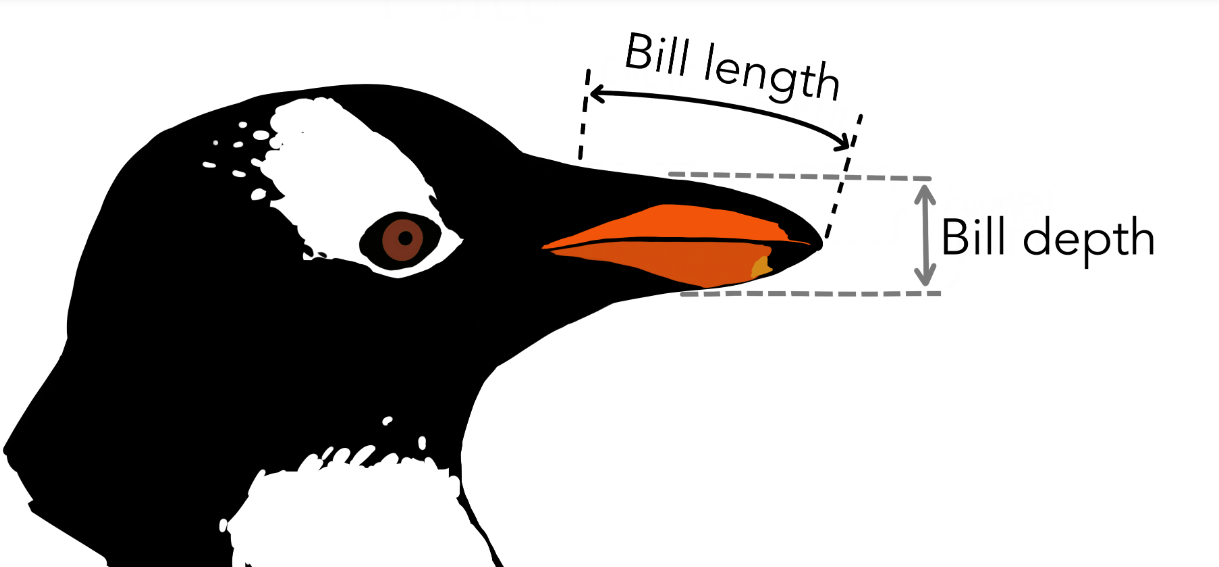

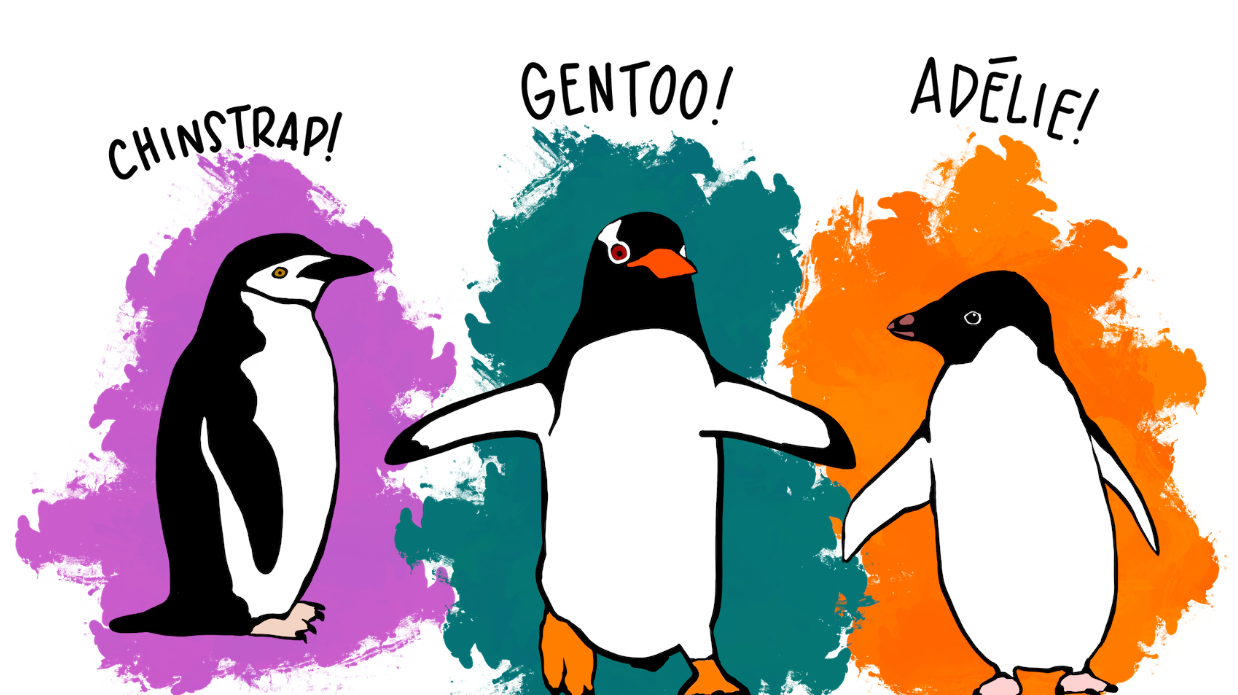

c:\Users\jorge\anaconda3\lib\site-packages\seaborn\distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


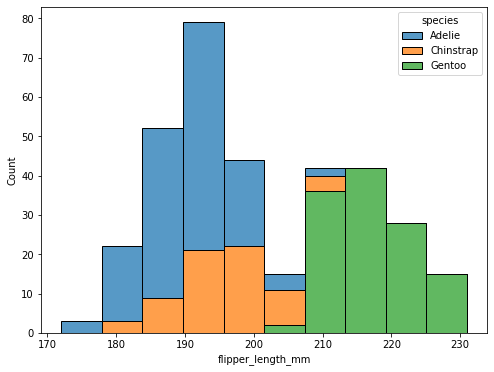

In [4]:


"""
data=penguins especifica que los datos a utilizar se encuentran en el DataFrame penguins.
x="flipper_length_mm" establece que la variable a trazar en el eje X es la longitud de las aletas de los pingüinos, medida en milímetros.
hue="species" especifica que se quiere separar las barras del histograma por especies de pingüinos, utilizando diferentes colores para cada especie.
multiple="stack" indica que se quiere un histograma apilado (stacked), en el que las barras
correspondientes a cada especie se apilan unas sobre otras en lugar de superponerse.

revisar más información en https://seaborn.pydata.org/generated/seaborn.histplot.html
"""
# Crear la figura con el tamaño deseado
plt.figure(figsize=(8, 6))
# Axes-level
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

c:\Users\jorge\anaconda3\lib\site-packages\seaborn\distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


'\nLa principal diferencia entre histplot y displot es que histplot traza histogramas, mientras que displot traza\ngráficos de distribución más generales, que pueden incluir histogramas, gráficos de densidad,\ngráficos de densidad de contorno, entre otros. Por lo tanto, displot es una función más versátil que histplot.\n\n '

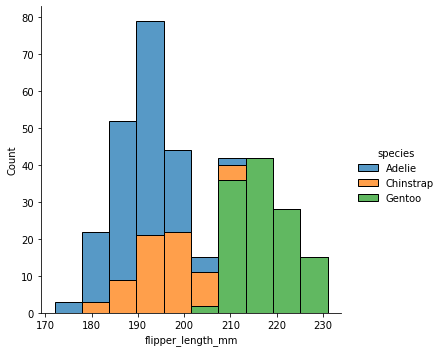

In [5]:
# Figure-level
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

"""
La principal diferencia entre histplot y displot es que histplot traza histogramas, mientras que displot traza
gráficos de distribución más generales, que pueden incluir histogramas, gráficos de densidad,
gráficos de densidad de contorno, entre otros. Por lo tanto, displot es una función más versátil que histplot.

 """


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

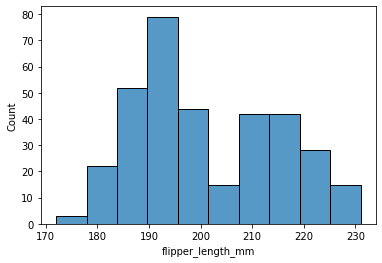

In [6]:
# Histograma
penguins = sns.load_dataset("penguins")
# Axis-level
sns.histplot(data=penguins, x="flipper_length_mm")

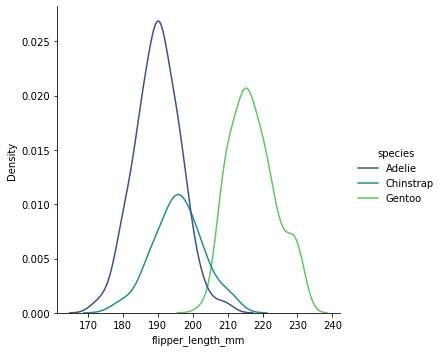

In [14]:


sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="layer", palette="viridis")
plt.show()

# https://seaborn.pydata.org/generated/seaborn.displot.html

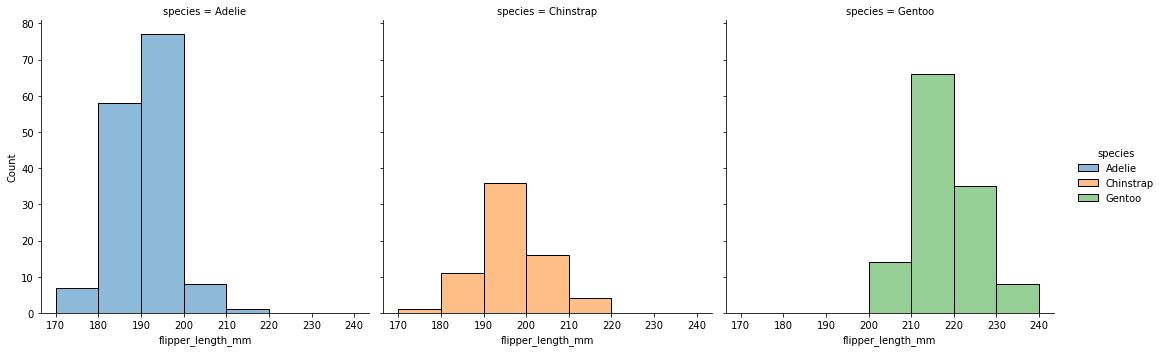

In [11]:
# Multiples figuras (Figure-level)
"""
col="species": especifica que se desea crear un gráfico separado para cada especie de pingüino,
es decir, se creará una columna de gráficos para cada especie de pingüino en lugar de mostrar todos los datos en un solo gráfico.
"""
# establecer los límites y bines para el histograma
bin_width = 10
bin_range = range(170, 250, bin_width)

# crear un histograma de la longitud de la aleta de los pingüinos con seaborn
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species", bins=bin_range)

#ahora se tiene gráficos de distribución separados

In [12]:
penguins["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

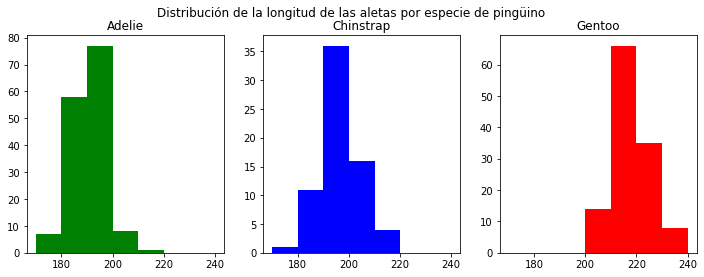

In [15]:
# probemos hacer esto con matplotlib
# crear histogramas separados para cada especie de pingüino
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))


axs[0].hist(penguins[penguins["species"]=="Adelie"]["flipper_length_mm"], color="g", bins=bin_range)
axs[0].set_title("Adelie")


axs[1].hist(penguins[penguins["species"]=="Chinstrap"]["flipper_length_mm"], color="b", bins=bin_range)
axs[1].set_title("Chinstrap")

axs[2].hist(penguins[penguins["species"]=="Gentoo"]["flipper_length_mm"], color="r", bins=bin_range)
axs[2].set_title("Gentoo")


fig.suptitle("Distribución de la longitud de las aletas por especie de pingüino")
plt.show()

#claramente podemos observar como con sns es más sencillo

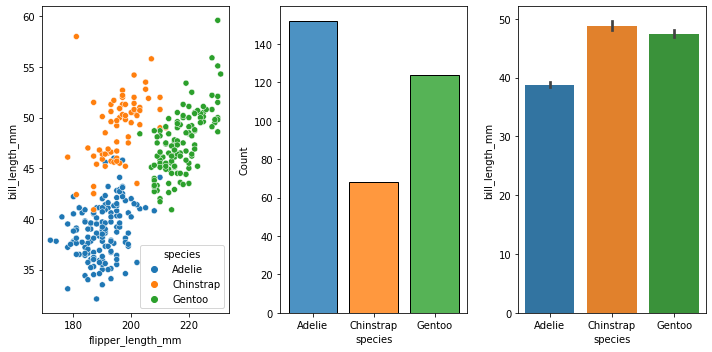

In [35]:
# Axis level
"""
* f, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw=dict(width_ratios=[4, 3])) crea una figura (f) con dos subplots (axs[0] y axs[1])
utilizando la función subplots() de Matplotlib. El parámetro 1, 2 indica que se quiere una fila de dos subplots, mientras que figsize=(8, 4)
establece el tamaño de la figura.

* El parámetro gridspec_kw=dict(width_ratios=[5, 5]) establece la proporción de ancho entre los dos subplots

*sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0]) traza una gráfica de dispersión utilizando la
función scatterplot() de Seaborn. La variable data especifica que los datos a utilizar se encuentran en el DataFrame penguins.
Los argumentos x e y especifican las variables a trazar en los ejes X e Y, respectivamente.
* El argumento hue especifica que se quiere separar los puntos por especies de pingüinos, utilizando diferentes colores para cada especie.

* El argumento ax=axs[0] indica que se quiere trazar la gráfica en el primer subplot (axs[0]).

* sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1]) traza un histograma utilizando la función histplot()
de Seaborn. El argumento data especifica que los datos a utilizar se encuentran en el DataFrame penguins.

* El argumento x="species" especifica que se quiere trazar un histograma de la variable categórica "species".

* El argumento hue="species" especifica que se quiere separar las barras del histograma por especies de pingüinos, utilizando diferentes colores para cada especie.

* Los argumentos shrink=.8 y alpha=.8 ajustan el tamaño y la transparencia de las barras del histograma.

* El argumento legend=False desactiva la leyenda del histograma. El argumento ax=axs[1] indica que se quiere trazar el histograma en el segundo subplot (axs[1]).

* f.tight_layout() ajusta el espacio entre los subplots para que no se superpongan.
"""
f, axs = plt.subplots(1, 3, figsize=(10, 5), gridspec_kw=dict(width_ratios=[5, 5, 5]))

sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
sns.barplot(data=penguins, x="species", y="bill_length_mm", ax=axs[2])

f.tight_layout()
plt.show()

In [29]:
# Figure-level
tips = sns.load_dataset("tips")
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


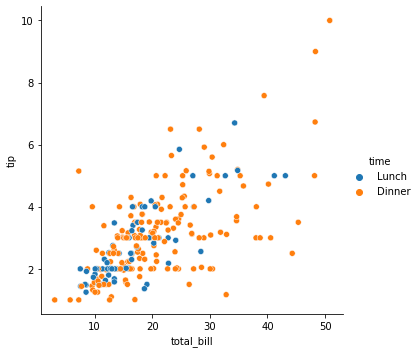

In [32]:
"""
la función sns.relplot() es una función más general que se utiliza para crear una variedad de gráficos de relación
que pueden incluir gráficos de dispersión, como también líneas, barras, y otros tipos de gráficos.
sns.relplot() permite crear gráficos de dispersión con múltiples variables categóricas o numéricas, y permite
agregar subgráficos para mostrar diferentes aspectos de los datos.
"""


g = sns.relplot(data=tips, x="total_bill", y="tip", hue="time", kind="scatter")
# probar kind= "line"



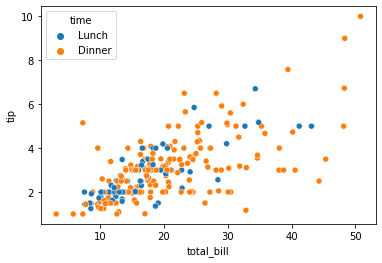

In [33]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
plt.show()

# parece que hay propinas más elevadas en las cenas (cuidado con esa conclusión de manera firme)

In [37]:
counts = tips["time"].value_counts()
counts

Dinner    176
Lunch      68
Name: time, dtype: int64

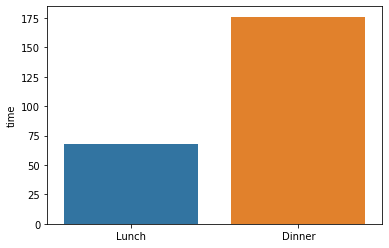

In [39]:
sns.barplot(x=counts.index, y=counts)
plt.show()

# es un dataset desbalanceado, ya que hay más muestras de cenas que de almuerzos


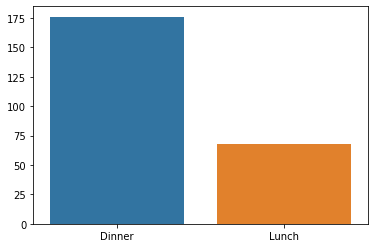

In [40]:
data= np.unique(tips.time, return_counts=True)
sns.barplot(x=data[0], y=data[1])
plt.show()


In [41]:
data

(array(['Dinner', 'Lunch'], dtype=object), array([176,  68], dtype=int64))

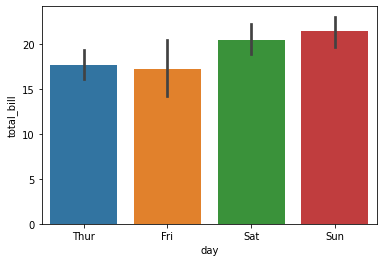

In [43]:
#sns.barplot(x=tips["day"], y=tips["total_bill"], ci=None) # sin la barra de errror



# sns.barplot(x="day", y="total_bill", data=tips) versión alternativa

"""
El límite inferior del error bar representa el valor más bajo que se espera que tenga la media de la población con una probabilidad del 90%
(o cualquier otro nivel de confianza especificado). De manera similar, el límite superior del error bar representa el valor más alto que se espera
 que tenga la media de la población con una probabilidad del 90% (o cualquier otro nivel de confianza especificado).

En general, cuanto más larga sea la línea del error bar, mayor será la incertidumbre en la estimación de la media de cada categoría y,
 por lo tanto, menos precisa será la medida. Por otro lado, cuanto más corta sea la línea del error bar, menor será la incertidumbre en la
 estimación de la media de cada categoría y, por lo tanto, más precisa será la medida.
"""

sns.barplot(x=tips["day"], y=tips["total_bill"], ci=90)
plt.show()

In [44]:
#calcular la media
tips[tips["day"]=="Thur"]["total_bill"].mean().round(1)

17.7

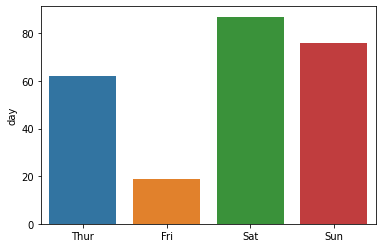

In [45]:
counts = tips["day"].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.show()



In [46]:
counts

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

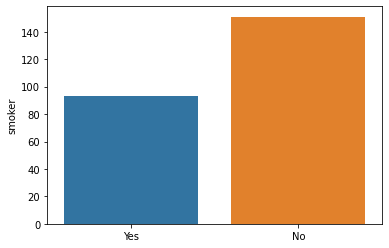

In [47]:
counts = tips["smoker"].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.show()

#hay muchos más clientes no fumadores

In [48]:
#calcular la media de total_bill de los fumadores los días jueves


tips[(tips["day"] == "Thur") & (tips["smoker"] == "Yes")]["total_bill"].mean().round(1)

# para "o" se usa el operador "|" 
# para el "y" se usa el operador "&"

19.2

<AxesSubplot:xlabel='day', ylabel='total_bill'>

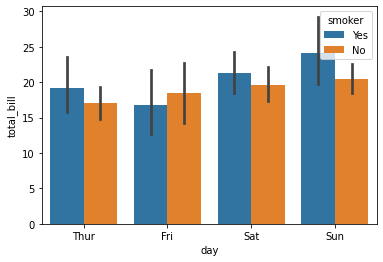

In [49]:
sns.barplot(x="day", y="total_bill", data=tips, hue='smoker')

#parece que los fumadores aunque son menos consumen muy similar a los no fumadores, algunas veces un poco más (esto en promedio)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

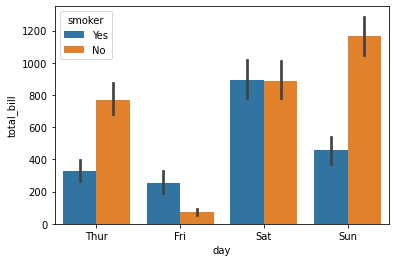

In [51]:
import numpy as np


sns.barplot(x="day", y="total_bill", data=tips, hue='smoker', estimator=np.sum)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

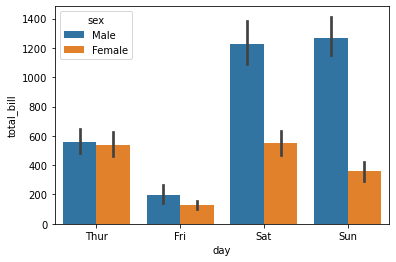

In [52]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips, estimator=np.sum)

In [53]:
# Lineplot
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

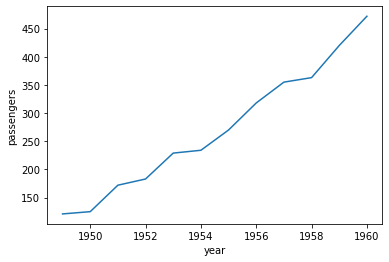

In [54]:
# Axis-level
may_flights = flights[flights["month"]=="May"]
sns.lineplot(data=may_flights, x="year", y="passengers")

In [55]:
# Axis-level
#flights_wide = flights.pivot("year", "month", "passengers")
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<AxesSubplot:xlabel='year'>

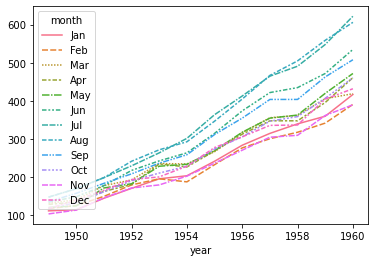

In [56]:
sns.lineplot(data=flights_wide)

In [57]:
sns.set_style(style="darkgrid", rc={"grid.color": ".6"})
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlelocation": "left"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "red"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "purple"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})

#revisar https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

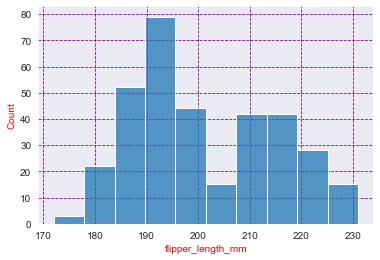

In [58]:
penguins = sns.load_dataset("penguins")
# Axis-level
sns.histplot(data=penguins, x="flipper_length_mm")

In [59]:
sns.reset_orig()
#valores por defecto nuevamente

BoxPlot

In [ ]:
#se recomienda leer https://www.kdnuggets.com/2019/11/understanding-boxplots.html

#Q1= p25
#Q2= p50= mediana
#Q3= p75

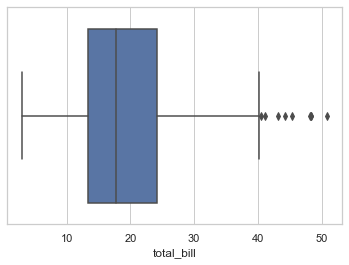

In [61]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
# Axis-level
ax = sns.boxplot(x=tips["total_bill"])

# probar con ax = sns.boxplot(y=tips["total_bill"])


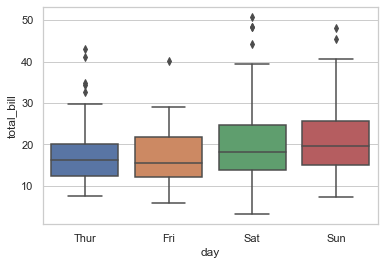

In [62]:
# Axis-level
ax = sns.boxplot(x="day", y="total_bill", data=tips)

In [45]:
import pandas as pd
df_lluvias = pd.read_csv('pune_1965_to_2002.csv', index_col=0)
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [46]:
# forma alternativa de cargar el dataset
"""
df_lluvias.index = df_lluvias['Year']
df_lluvias = df_lluvias.drop('Year', axis='columns')
df_lluvias
"""

"\ndf_lluvias.index = df_lluvias['Year']\ndf_lluvias = df_lluvias.drop('Year', axis='columns')\ndf_lluvias\n"

'\nCuando se establece sharex=True, todos los subgráficos comparten el mismo eje x, lo que significa\nque la escala del eje x es la misma en todos los subgráficos y los ticks del eje x se establecen solo en el subgráfico\ninferior. Esto es útil cuando se desea comparar la información en los subgráficos en el mismo rango de valores en el eje x.\n\nDe manera similar, cuando se establece sharey=True, todos los subgráficos comparten el mismo eje y,\nlo que significa que la escala del eje y es la misma en todos los subgráficos y los ticks del eje y se\n establecen solo en el subgráfico izquierdo. Esto es útil cuando se desea comparar la información en los\n subgráficos en el mismo rango de valores en el eje y.\n\nEsto nos facilita la comparación de la información en los subgráficos.\n'

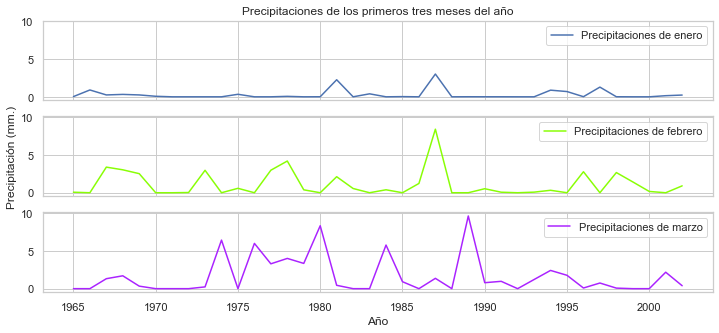

In [47]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)
ax[0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='#89fe05')
ax[2].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='#aa23ff')
ax[0].set_title('Precipitaciones de los primeros tres meses del año')
ax[2].set_xlabel('Año')
ax[1].set_ylabel('Precipitación (mm.)')

ax[0].legend()
ax[1].legend()
ax[2].legend()

#revisar los colores en https://xkcd.com/color/rgb/

# https://taniaizquierdo.com/color-hexadecimal/#:~:text=El%20color%20hexadecimal%20es%20un,por%20sus%20siglas%20en%20ingl%C3%A9s).


"""
Cuando se establece sharex=True, todos los subgráficos comparten el mismo eje x, lo que significa
que la escala del eje x es la misma en todos los subgráficos y los ticks del eje x se establecen solo en el subgráfico
inferior. Esto es útil cuando se desea comparar la información en los subgráficos en el mismo rango de valores en el eje x.

De manera similar, cuando se establece sharey=True, todos los subgráficos comparten el mismo eje y,
lo que significa que la escala del eje y es la misma en todos los subgráficos y los ticks del eje y se
 establecen solo en el subgráfico izquierdo. Esto es útil cuando se desea comparar la información en los
 subgráficos en el mismo rango de valores en el eje y.

Esto nos facilita la comparación de la información en los subgráficos.
"""

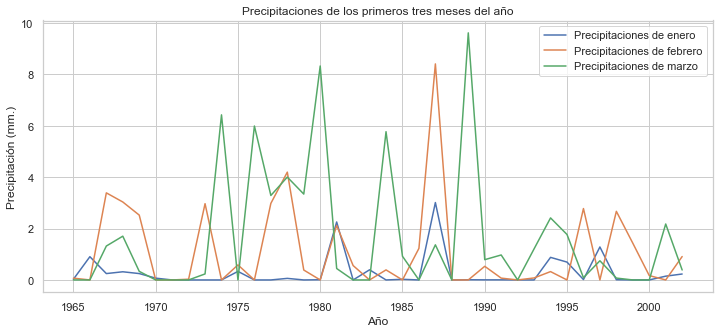

In [48]:
# las 3 lineas en un solo gráfico
fig, ax = plt.subplots( figsize=(12, 5), sharex=True, sharey=True)
ax.plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax.plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')
ax.set_title('Precipitaciones de los primeros tres meses del año')
ax.set_xlabel('Año')
ax.set_ylabel('Precipitación (mm.)')

ax.legend()
ax.legend()
ax.legend()

#revisar posición de colores en https://matplotlib.org/stable/gallery/color/color_cycle_default.html

<AxesSubplot:xlabel='Year'>

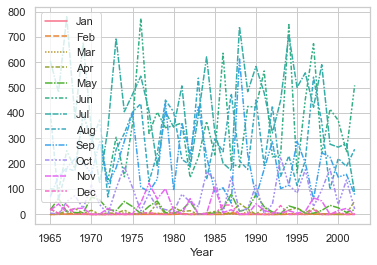

In [49]:
sns.lineplot(data=df_lluvias)
#no recomendado dibujar todas las lineas porque hay meses donde la lluvia es cercana a 0 y en otros meses es muy elevada, la amplitud es muy marcada

Text(0, 0.5, '(Etiqueta eje vert.)')

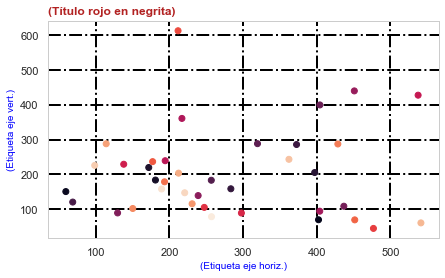

In [50]:
import matplotlib as mpl
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlecolor'] = 'firebrick'
mpl.rcParams['axes.labelcolor'] = 'blue'
mpl.rcParams['axes.labelsize'] = '10'
mpl.rcParams['axes.labelweight'] = 'light'
mpl.rcParams['axes.linewidth'] = '1'
mpl.rcParams['grid.color'] = 'black'
mpl.rcParams['grid.linestyle'] = '-.'
mpl.rcParams['grid.linewidth'] = '2'

fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)
ax.set_title('(Título rojo en negrita)')
ax.set_xlabel('(Etiqueta eje horiz.)')
ax.set_ylabel('(Etiqueta eje vert.)')

In [51]:
#  Restaurar por defecto
mpl.rcParams.update(mpl.rcParamsDefault)

In [52]:
sns.set_style(style="darkgrid", rc={"grid.color": ".6"})
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlelocation": "left"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "red"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "purple"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})

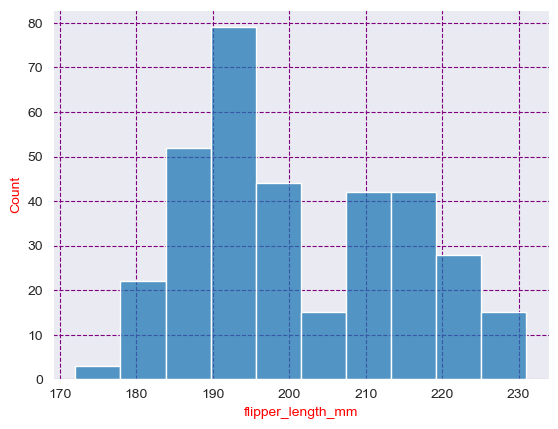

In [53]:
penguins = sns.load_dataset("penguins")
# Axis-level
sns.histplot(data=penguins, x="flipper_length_mm")
plt.show()